Solving of partial differential equations (PDE)

# Laplace equation

$$
\begin{equation}
    \begin{cases}

        \Delta u = 0, \;\;\;\; a < x < b, \; c < y < d\\
        u(a, y) = u_x(b, y) = 0\\
        u(x, c) = 0, \; u(x, d) = \sin{\frac{\pi x}{2}}

    \end{cases}
\end{equation}
$$


$$ u_i^j = \frac{1}{4}(u_{i-1}^{j} + u_{i+1}^{j} + u_{i}^{j-1} + u_{i}^{j+1}) $$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from helper import round_to, print_3d_funcan

# Simple iteration method

In [19]:
def laplaceq_siter(xd: np.ndarray[float], yd: np.ndarray[float], h=0.1, error=0.001) -> tuple[list[list[float]], int]:
    """
    Solving the Laplace equation with Neumann conditions with simple iteration method
        xd:     np.ndarray[float], x domain

        yd:     np.ndarray[float], y domain

        h:      float, step

        error:  float, difference between current step and the next one

        return: tuple[list[list[float]], int], grid of solutions and number of iterations

    """
    n, m = len(xd), len(yd)
    sol = [[0] * n for _ in range(m)]

    # boundary condition
    for i in range(n):
        sol[-1][i] = np.sin(np.pi * xd[i] / 2) 

    prev_error = error + 1
    cur_error = 0
    k = 0
    while abs(prev_error - cur_error) > error:
        prev_error = cur_error
        cur_error = 0

        # boundary condition with derrivative
        for y in range(1, m - 1):
            sol[y][-1] = sol[y][-2]

        prev_sol = deepcopy(sol)

        for y in range(1, m - 1):
            for x in range(1, n - 1):
                sol[y][x] = (prev_sol[y - 1][x] + prev_sol[y][x - 1] + prev_sol[y][x + 1] + prev_sol[y + 1][x]) / 4
                cur_error += sol[y][x]**2
        
        cur_error = cur_error**0.5
        k += 1
    
    return sol, k
    

__Analytical solution:__

In [20]:
def fan(x: float, y: float) -> float:
    return np.sinh(np.pi / 2 * y) * np.sin(np.pi / 2 * x) / np.sinh(np.pi / 2)

Number of iterations till 0.001 error: 105
0.099 17.92 %


/tmp/ipykernel_3476/2483431327.py:38: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = max(rel_error, abs(s[y, x] - s_an[y, x]) / abs(s_an[y, x]) * 100)


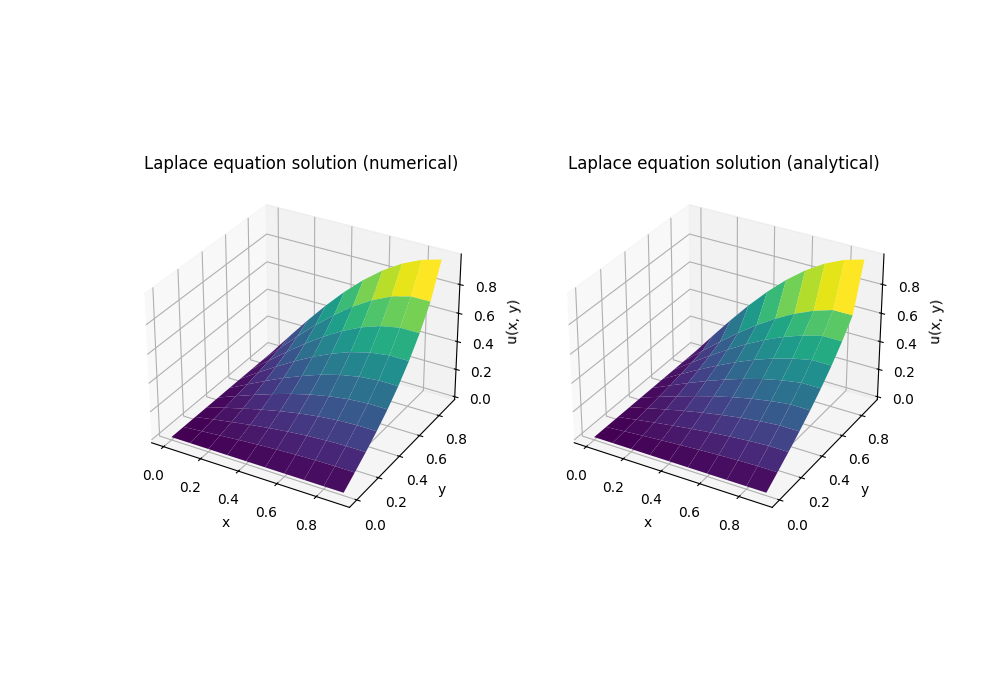

In [21]:
%matplotlib ipympl

h = 0.1
error = 0.001
a, b = 0, 1
c, d = 0, 1

xd, yd = np.arange(a, b, h), np.arange(c, d, h)

s, k = laplaceq_siter(xd, yd, h=h, error=error)
s = np.matrix(s) # must be such format to plot
print(f'Number of iterations till {error} error: {k}')

# analytical
n, m = len(xd), len(yd)
s_an = [[0] * n for _ in range(m)]

# boundary
for i in range(n):
    s_an[-1][i] = np.sin(np.pi * xd[i] / 2)

for x in range(1, n - 1):
    for y in range(1, m - 1):
        s_an[y][x] = fan(xd[x], yd[y])

# initial
for y in range(1, m - 1):
    s_an[y][-1] = s_an[y][-2]

s_an = np.matrix(s_an)

# errors 
abs_error = 0
rel_error = 0
for y in range(m):
    for x in range(n):
        abs_error = max(abs_error, abs(s[y, x] - s_an[y, x]))
        rel_error = max(rel_error, abs(s[y, x] - s_an[y, x]) / abs(s_an[y, x]) * 100)

print(round_to(abs_error), round_to(rel_error), "%")

print_3d_funcan(xd, yd, s, s_an)

# Siedel's method

In [22]:
def laplaceq_siedel(xd: list[float], yd: list[float], h=0.1, error=0.001) -> tuple[list[list[float]], int]:
    """
    Solving the Laplace equation with Neumann conditions with Siedel's method
        xd:    np.ndarray[float], x domain

        yd:    np.ndarray[float], y domain

        h:     float, step

        error: float, difference between current step and the next one

        return: tuple[list[list[float]], int], grid of solutions and number of iterations

    """
    n, m = len(xd), len(yd)

    sol = [[0] * n for _ in range(m)]

    for i in range(n):
        sol[-1][i] = np.sin(np.pi * xd[i] / 2) 

    prev_error = error + 1
    cur_error = 0
    k = 0
    while abs(prev_error - cur_error) > error:
        prev_error = sum(sum(row[1:-1]) for row in sol[1:-1]) / (n - 2) / (m - 2)

        for y in range(1, m - 1):
            sol[y][-1] = sol[y][-2]

        for y in range(1, m - 1):
            for x in range(1, n - 1):
                sol[y][x] = (sol[y - 1][x] + sol[y][x - 1] + sol[y][x + 1] + sol[y + 1][x]) / 4
        
        cur_error = sum(sum(row[1:-1]) for row in sol[1:-1]) / (n - 2) / (m - 2)
        k += 1
    
    return sol, k

Number of iterations till 0.001 error: 40
0.094 16.81 %


/tmp/ipykernel_3476/2991357812.py:37: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = max(rel_error, abs(s[y, x] - s_an[y, x]) / abs(s_an[y, x]) * 100)


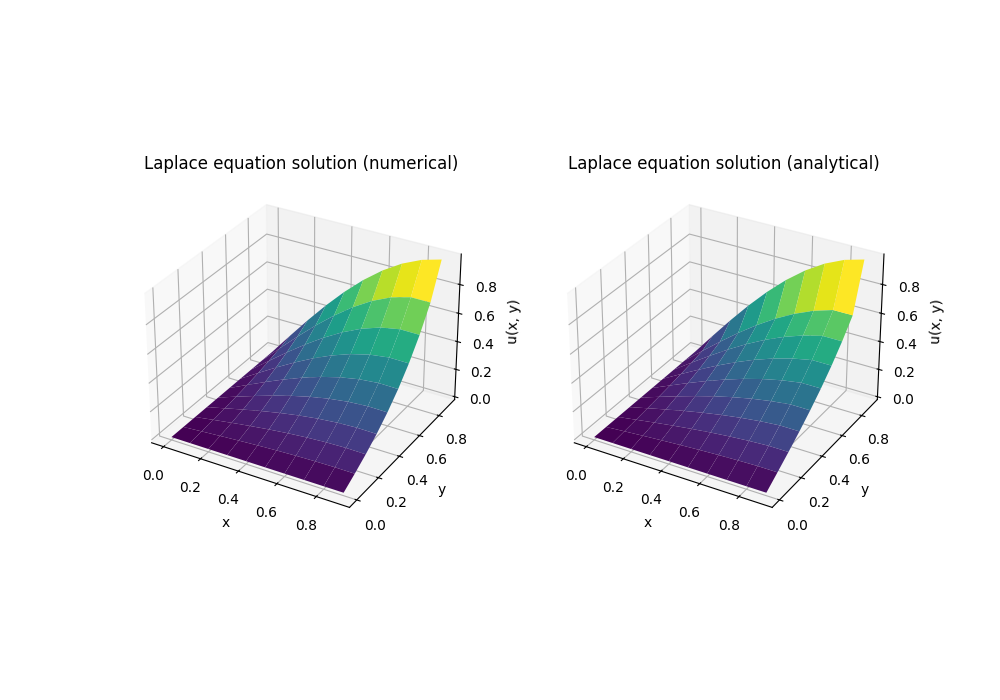

In [23]:
%matplotlib ipympl

h = 0.1
error = 0.001
a, b = 0, 1
c, d = 0, 1

xd, yd = np.arange(a, b, h), np.arange(c, d, h)

s, k = laplaceq_siedel(xd, yd, h=h, error=error)
s = np.matrix(s)
print(f'Number of iterations till {error} error: {k}')

# analytical
n, m = len(xd), len(yd)
s_an = [[0] * n for _ in range(m)]

for i in range(n):
    s_an[-1][i] = np.sin(np.pi * xd[i] / 2)

for x in range(1, n - 1):
    for y in range(1, m - 1):
        s_an[y][x] = fan(xd[x], yd[y])

for y in range(1, m - 1):
    s_an[y][-1] = s_an[y][-2]

s_an = np.matrix(s_an)

# errors
abs_error = 0
rel_error = 0
l2 = 0
for y in range(m):
    for x in range(n):
        abs_error = max(abs_error, abs(s[y, x] - s_an[y, x]))
        rel_error = max(rel_error, abs(s[y, x] - s_an[y, x]) / abs(s_an[y, x]) * 100)
        l2 = s[y, x]**2

print(round_to(abs_error), round_to(rel_error), "%")

print_3d_funcan(xd, yd, s, s_an)

In [24]:
def laplaceq_relaxation(xd: list[float], yd: list[float], h=0.1, error=0.001, w=1) -> tuple[list[list[float]], int]:
    """
    Solving the Laplace equation with Neumann conditions with Siedel's method
        xd:    np.ndarray[float], x domain

        yd:    np.ndarray[float], y domain

        h:     float, step

        error: float, difference between current step and the next one

        w:     float

        return: tuple[list[list[float]], int], grid of solutions and number of iterations

    """
    n, m = len(xd), len(yd)

    sol = [[0] * n for _ in range(m)]

    for i in range(n):
        sol[-1][i] = np.sin(np.pi * xd[i] / 2) 

    prev_error = error + 1
    cur_error = 0
    k = 0
    while abs(prev_error - cur_error) > error:
        prev_error = cur_error
        cur_error = 0

        for y in range(1, m - 1):
            sol[y][-1] = sol[y][-2]

        for y in range(1, m - 1):
            for x in range(1, n - 1):
                sol[y][x] = w * (sol[y - 1][x] + sol[y][x - 1] + sol[y][x + 1] + sol[y + 1][x]) / 4 + (1 - w) * sol[y][x]
                cur_error += (sol[y][x])**2 
        
        cur_error = cur_error**0.5 
        k += 1
    
    return sol, k

Количество итераций до разницы 0.001 при w = 1.0: 66
w = 1.0: 0.1 18.11

Количество итераций до разницы 0.001 при w = 1.1: 57
w = 1.1: 0.1 18.15

Количество итераций до разницы 0.001 при w = 1.2: 49
w = 1.2: 0.1 18.19

Количество итераций до разницы 0.001 при w = 1.3: 42
w = 1.3: 0.1 18.22

Количество итераций до разницы 0.001 при w = 1.4: 36
w = 1.4: 0.1 18.25

Количество итераций до разницы 0.001 при w = 1.5: 29
w = 1.5: 0.1 18.26

Количество итераций до разницы 0.001 при w = 1.6: 23
w = 1.6: 0.1 18.29

Количество итераций до разницы 0.001 при w = 1.7: 18
w = 1.7: 0.1 18.36

Количество итераций до разницы 0.001 при w = 1.8: 15
w = 1.8: 0.1 30.78

Количество итераций до разницы 0.001 при w = 1.9: 9
w = 1.9: 0.11 147.39

Количество итераций до разницы 0.001 при w = 2.0: 61
w = 2.0: 0.1 20.57



/tmp/ipykernel_3476/1809105476.py:24: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = max(rel_error, abs(s[y, x] - s_an[y, x]) / abs(s_an[y, x]) * 100)


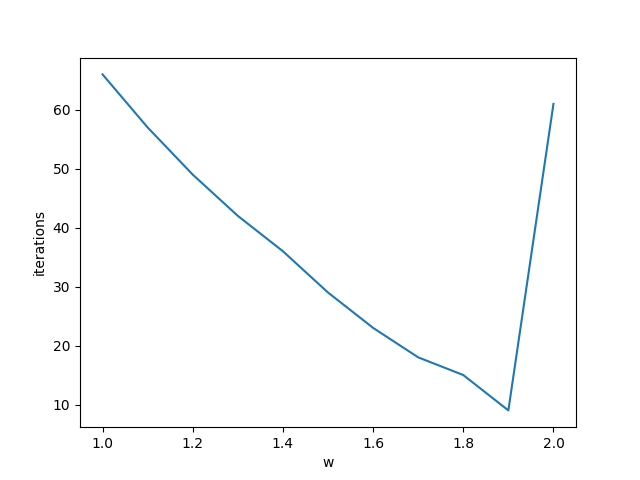

In [25]:
h = 0.1
error = 0.001
a, b = 0, 1
c, d = 0, 1

xd, yd = np.arange(a, b, h), np.arange(c, d, h)
n, m = len(xd), len(yd)
ws = []
wn = 20

for w in range(10, wn + 1):
    s, k = laplaceq_relaxation(xd, yd, h=h, error=error, w=(w / 10))
    s = np.matrix(s)
    print(f'Количество итераций до разницы {error} при w = {w / 10}: {k}')
    ws.append(k)

    # error calculation
    abs_error = 0
    rel_error = 0
    l2 = 0
    for y in range(m):
        for x in range(n):
            abs_error = max(abs_error, abs(s[y, x] - s_an[y, x]))
            rel_error = max(rel_error, abs(s[y, x] - s_an[y, x]) / abs(s_an[y, x]) * 100)
            l2 = s[y, x]**2

    print(f"w = {w / 10}:", round_to(abs_error), round_to(rel_error))
    print()

# number of iterations depends on w
fig, ax = plt.subplots()
ax.plot([x / 10 for x in range(10, wn + 1)], ws)
ax.set_xlabel("w")
ax.set_ylabel("iterations")
plt.show()